<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_final_amostra_03_dez_01_2021_roda_04_A_80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
#!pip install mahotas

In [3]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [4]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado


In [5]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [6]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines


In [8]:
FILE='SugarSample03.zip'
img_name=[]
x_original = [] 

data_file ='xls'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        #df =pd.read_csv(name)
        if( k > 0):
          df_old = df_ImgJ.copy()
        df_ImgJ = pd.read_excel(name)
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [9]:
f.namelist()

['Results_03_02.xls', 'Results_03_03.xls', 'Results_03_01.xls']

In [10]:
df_ImgJ.shape

(174, 13)

In [11]:
df_ImgJ.head()

,,Area,Mean,Min,Max,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret
0,2,1.288,255,255,255,1.383,1.185,5.847,1.636,767,213,18.157,1.161
1,3,0.407,255,255,255,0.814,0.637,62.186,0.877,283,234,59.036,0.667
2,4,0.592,255,255,255,0.925,0.815,117.923,1.078,633,154,122.335,0.802
3,5,1.391,255,255,255,1.435,1.235,29.966,1.564,1321,333,53.253,1.165
4,6,0.549,255,255,255,0.923,0.758,136.396,1.024,370,254,118.237,0.738


In [12]:
df_ImgJ.head()

,,Area,Mean,Min,Max,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret
0,2,1.288,255,255,255,1.383,1.185,5.847,1.636,767,213,18.157,1.161
1,3,0.407,255,255,255,0.814,0.637,62.186,0.877,283,234,59.036,0.667
2,4,0.592,255,255,255,0.925,0.815,117.923,1.078,633,154,122.335,0.802
3,5,1.391,255,255,255,1.435,1.235,29.966,1.564,1321,333,53.253,1.165
4,6,0.549,255,255,255,0.923,0.758,136.396,1.024,370,254,118.237,0.738


In [13]:
from Segment_Filter import Segmenta  # got image provided segmented

In [14]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [15]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [16]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [17]:
Img_Size = 28

In [18]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 152ms/step - loss: 0.5986 - accuracy: 0.7784 - val_loss: 0.6936 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 129ms/step - loss: 0.2694 - accuracy: 0.8834 - val_loss: 0.6932 - val_accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 1s 130ms/step - loss: 0.2039 - accuracy: 0.8980 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 130ms/step - loss: 0.0991 - accuracy: 0.9621 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 127ms/step - loss: 0.0639 - accuracy: 0.9679 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 127ms/step - loss: 0.0340 - accuracy: 0.9883 - val_loss: 0.6933 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 126ms/step - loss: 0.0491 - accuracy: 0.9825 - val_loss: 0.6934 - val_accuracy: 0.5102

In [20]:
Y_test = yback(Y_test)

In [21]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        62  10
1         1  74


In [22]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        72
           1       0.88      0.99      0.93        75

    accuracy                           0.93       147
   macro avg       0.93      0.92      0.92       147
weighted avg       0.93      0.93      0.92       147



In [23]:
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [24]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [25]:
Sample3 =[4,13,25]
Repetir = 80
for i in range(Repetir):
  k = 0
  for i in Sample3:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [26]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,136.642517,138.209473,121.399765,97.073288,84.019478,80.216660,74.306786,65.945145,66.377220,63.049469,74.823524,87.608749,89.910095,77.803429,68.538223,68.274025,64.837067,99.023117,120.723785,118.320999,123.324120,117.676025,118.070427,118.572350,121.366379,119.350586,115.235214,124.933907,143.925018,144.325165,121.950882,88.043419,49.877728,38.167187,41.269638,64.763954,80.603874,88.748436,85.228767,82.867470,...,59.145256,48.826321,69.003426,68.927200,56.893070,37.403667,19.085653,6.550239,2.805053,2.432437,1.180080,0.107232,97.844383,97.159164,104.733696,101.057281,100.693565,93.428986,85.270424,88.310379,88.343712,84.942818,87.113586,92.895973,97.578529,99.870712,110.173378,113.282089,82.543266,17.513748,8.116443,2.399939,2.433797,5.581816,3.709136,2.576729,1.416166,2.257884,1.180080,0.107232
1,142.715714,153.923477,158.138718,155.168991,144.478195,108.129700,124.504372,149.351425,155.090942,152.481964,147.185196,155.204849,157.128738,149.818283,149.295242,200.969162,252.503006,252.731934,252.466187,187.848877,57.214539,114.536903,120.704788,127.670593,129.078903,132.569824,141.554199,151.539795,144.358078,152.671997,159.379669,165.962372,163.239182,155.442627,140.910736,147.647903,150.307541,140.773712,143.685135,144.651489,...,162.317383,144.027557,140.120712,147.475433,141.662018,142.476959,160.864914,168.904510,171.835022,177.357254,218.289291,245.045807,207.210266,218.674347,236.405548,240.401398,233.272552,213.374680,193.716141,166.975082,163.306580,167.996964,173.993774,166.104248,165.060364,159.870056,161.503967,166.030746,164.161255,141.664917,139.709335,145.856628,146.749344,148.470596,158.711853,166.645691,158.464523,171.021179,214.740753,249.651779
2,156.902786,157.418991,149.310181,141.427475,133.751541,138.060959,135.033173,138.935196,136.277008,130.543976,130.016205,130.934433,132.573303,132.654327,134.330246,138.800934,140.289368,137.389664,127.765434,112.274704,108.714508,109.552483,99.347221,82.806328,80.372688,91.375000,109.806328,115.932106,144.270828,136.946762,127.819435,132.086426,135.145065,132.905869,133.249237,135.092606,135.984573,134.452164,135.265427,132.569443,...,172.428238,160.407425,135.351852,148.145828,156.885025,161.538574,161.393524,175.731491,184.013123,190.682877,200.185959,181.010040,61.554787,142.169754,149.259277,111.361115,44.010033,43.302467,54.371918,61.797836,83.585648,108.032410,107.680557,93.216049,53.820217,43.063274,75.162811,151.255402,179.370361,146.359573,134.090271,145.538589,157.253860,163.787811,162.164352,164.929779,159.761581,109.781647,95.647385,95.576393
3,12.324601,38.854271,32.487858,22.988302,16.336927,6.230374,14.829048,67.315018,61.377220,78.107063,86.916695,95.665871,97.453423,85.896568,59.598499,52.975433,50.243500,80.943596,100.711220,98.611313,86.495262,73.040268,34.869083,136.992340,154.899124,136.054276,112.481255,111.850761,23.123823,62.718208,71.430229,84.593498,97.310654,93.856743,75.895012,61.953476,76.899994,91.462440,92.879402,96.081841,...,181.347382,181.623459,170.084122,165.742676,173.866943,192.734161,206.378220,208.593719,210.570847,129.854324,89.461411,124.086823,143.950073,136.430405,124.073868,128.746689,135.832504,147.776855,158.816315,181.837433,174.293427,132.097015,101.472473,99.119705,96.518509,110.055466,151.046463,182.274536,185.128204,182.758530,174.052902,159.484802,165.857346,178.541946,195.516144,191.593414,117.964249,87.565666,106.265266,118.012016
4,178.198395,178.615997,184.337616,193.299194,199.913605,197.372803,192.192001,181.371216,167.598404,158.233597,153.783997,149.030396,144.940781,146.505615,152.070404,158.251190,162.832001,162.115204,154.537598,158.148788,171.955200,182.000000,183.240005,186.387207,186.824005,183.014404,178.136002,177.388794,1

In [27]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [28]:
#df_ann

In [29]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [30]:
img_graos.shape

(5, 785)

In [31]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
img_graos.shape

(5, 785)

In [33]:
Width=np.array(Width_new)

In [34]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [35]:

!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))
''''''

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


''

In [36]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [37]:
Width.shape

(5,)

In [38]:
Width

array([119, 103, 102, 171, 107])

In [39]:
img_graos.shape

(5, 785)

In [40]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
20,119.0,1.892734,2.266436,1.404844,0.484429,3.380623,4.183391,1.927336,5.498270,13.806229,20.394463,20.692041,19.266436,15.186852,4.508651,1.854671,2.006920,0.885813,2.491349,0.577855,1.000000,1.000000,1.000000,1.000000,1.719723,1.401384,1.062284,2.377163,5.650519,5.809689,8.356401,10.235294,18.269896,35.159168,59.574394,81.747406,102.868515,135.190308,152.020752,160.823532,...,122.207611,124.609001,121.557091,114.740479,107.266434,108.152252,126.366776,149.730103,165.228378,164.889267,163.882339,159.688583,155.723190,165.626312,169.339111,165.435989,158.152252,153.197235,157.183380,164.560547,167.038055,173.162643,176.961945,176.733566,170.363312,165.968857,154.816620,123.190308,112.726654,107.335640,101.238762,94.740479,85.875435,85.944641,106.968857,142.138412,163.698959,165.297577,163.086517,159.058838
45,103.0,2.770949,0.728155,0.804694,1.000000,1.000000,1.003582,1.714959,1.606372,1.527854,1.190027,1.578000,1.366104,1.090489,1.354982,1.170233,0.926100,2.033839,3.513526,0.751720,1.055048,1.522292,2.207748,2.686775,0.691111,2.842775,1.615892,0.899708,0.923461,1.438684,1.470355,1.443963,0.974173,0.586012,0.625035,1.419172,1.029692,1.037138,1.368932,0.982845,...,127.674721,132.414078,138.888489,144.456009,151.711639,155.921097,141.284851,110.300781,104.735870,107.904144,104.890083,102.572441,147.238373,134.832123,127.154770,123.458664,126.189087,130.018845,136.328766,131.097931,117.510033,121.445175,124.022720,121.863983,121.201897,121.967850,122.230087,124.955124,129.611938,130.930435,132.614563,147.288727,154.180878,156.526627,143.630219,104.441040,106.934387,113.514084,110.157501,110.735123
85,102.0,112.501740,115.785858,127.495972,132.613235,134.661667,136.452530,139.904282,140.640152,143.218384,147.219147,148.944656,148.660919,144.513275,144.349487,141.399857,135.631302,128.249146,127.023460,119.174942,96.795074,152.196487,249.941208,252.000000,252.000046,252.000015,252.000046,251.725510,250.654373,136.048843,134.685516,127.076134,130.341812,130.516357,132.780869,133.645920,135.908890,142.046555,146.660904,148.023468,...,135.757416,135.080750,137.145355,136.577087,136.921585,137.106125,135.727036,136.523651,137.104202,137.999252,137.611694,137.369492,139.450989,137.132660,137.685516,135.553253,133.630539,126.410240,122.148804,112.506355,104.639755,63.940025,61.841606,55.852367,52.282204,104.634377,124.063065,130.675903,134.574799,136.295670,135.755890,137.471375,137.088440,138.307968,138.296051,136.610550,136.941956,136.448303,134.035385,138.709747
103,171.0,0.731883,1.756472,0.673506,0.451284,1.601177,18.599775,103.199478,148.670303,146.565033,141.726837,135.806412,138.170624,147.241272,144.006226,137.155823,130.190140,121.137276,114.307892,115.153854,111.241272,104.949860,101.263123,97.493660,115.904716,133.215424,135.004471,134.837769,134.348740,0.702199,1.705721,0.646695,0.424472,1.687152,5.039431,24.076401,94.167435,142.857025,157.164246,159.586456,...,150.420639,135.124313,98.585747,75.258369,66.128899,66.470818,64.148323,67.374817,68.474197,70.527885,74.360626,88.206726,0.731883,1.756472,0.673506,0.451284,6.426319,131.995422,189.811935,183.731033,198.998322,225.094757,214.692657,193.731064,175.116379,134.172852,115.763077,134.641983,138.981506,120.230980,82.103958,69.548447,68.576485,65.958588,65.753326,66.701920,67.743172,68.336449,83.156219,96.633804
109,107.0,57.105690,54.902172,57.638222,59.077824,44.540485,52.602844,96.237228,97.231720,104.998512,112.498383,111.812485,113.028641,101.451042,97.868378,94.304306,80.487198,77.411301,79.727318,82.207962,86.690628,101.237930,107.361771,101.095291,86.947861,78.976685,80.886368,86.029526,94.498039,58.104031,54.655342,54.073891,48.919731,35.762600,47.576908,99.107170,104.984886,112.077568,115.7

In [41]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [42]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [43]:
len(Diameter_All)

5

In [44]:
#

PSD_new['Area'].shape

(95,)

In [45]:
#PSD_new.shape

In [46]:
#lost_value = float(PSD_new.columns[1])
#Area2 = np.array(PSD_new.iloc[:,1])
#Area2 = np.concatenate( (Area2, [lost_value] ) )
Area2 = PSD_new['Area'].values
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5) 


In [47]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [48]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268
0,1.280599,0.719867,0.868192,1.330818,0.836067,0.923618,0.955465,0.904113,0.697408,0.911127,1.045198,0.970012,0.579772,0.628255,0.600272,0.659885,0.934581,0.731273,0.777682,1.113042,0.753568,0.874039,0.918781,0.970012,0.623168,1.355934,0.932536,0.906925,0.858607,0.660849,0.952796,1.028621,0.891348,0.85638,0.575363,1.260557,1.048239,0.606602,0.860088,0.769452,...,1.550444,0.782578,1.469061,1.053087,1.267607,0.7744,1.378748,1.363893,1.299352,1.287045,1.118178,0.947435,1.521848,1.352644,1.155694,1.601345,1.274619,1.422384,1.340826,1.172646,1.149065,1.45906,1.248377,1.336546,0.960117,1.486723,1.427745,1.350288,0.756098,1.259041,1.134568,1.654913,1.120453,1.117608,0.91531,1.163927,1.306681,1.152936,1.30473,1.306681
1,0.875549,0.689306,1.011479,1.171428,0.862915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
Diameter_All

[0.8755491011271135,
 0.6893063667641409,
 1.0114793201310244,
 1.171428480963255,
 0.8629152779165575]

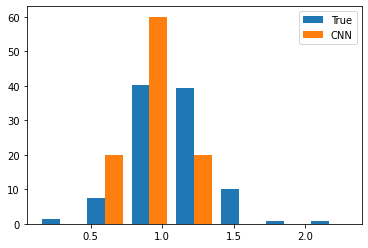

In [50]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [51]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.0865462723070898 desvio= 0.279391220003608 pontos= 269


In [52]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 0.9221357093804181 desvio= 0.1612551029269144 pontos= 5


In [53]:
np.mean(np.array(Diameter_All))

0.9221357093804181

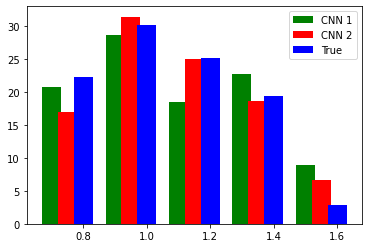

In [54]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434]
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])